# **Using morphological transforms to enhance the contrast of medical images**

In [ ]:
# Importing the required libraries
import cv2 as cv
from google.colab.patches import cv2_imshow as show
import numpy as np
from matplotlib import pyplot as plt

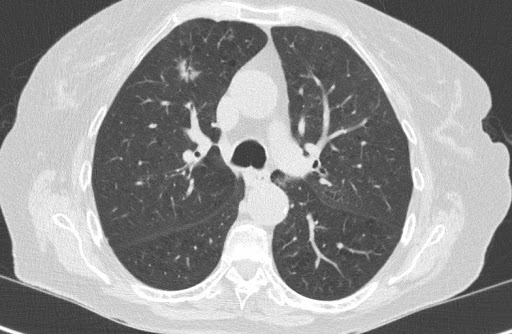

In [ ]:
# Reading the image
img = cv.imread('/content/drive/My Drive/image_processing_project/img_1.jpg',0)
show(img)

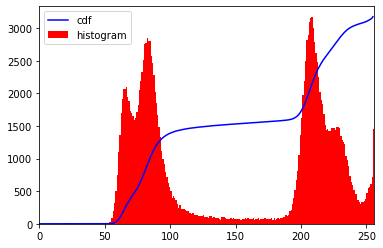

In [ ]:
# Plotting histogram distribution for the image
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# **Testing the use of various morphological operators on the image**

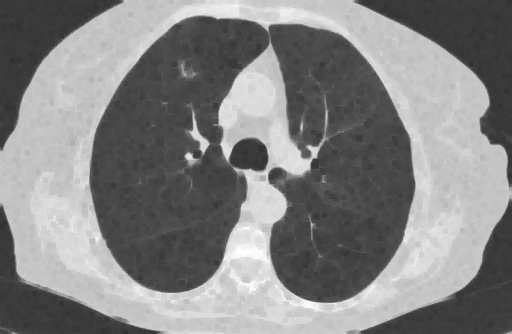

In [ ]:
# Erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
show(erosion)

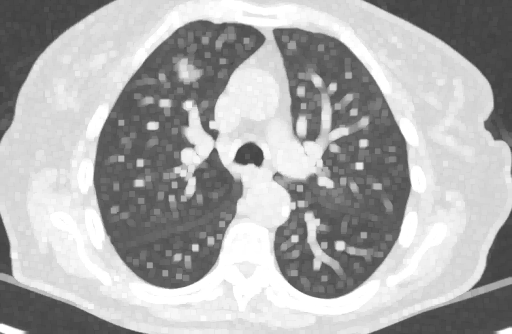

In [ ]:
# Dilation
dilation = cv.dilate(img,kernel,iterations = 1)
show(dilation)

In [ ]:
# Kernel
mask = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15))
mask

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

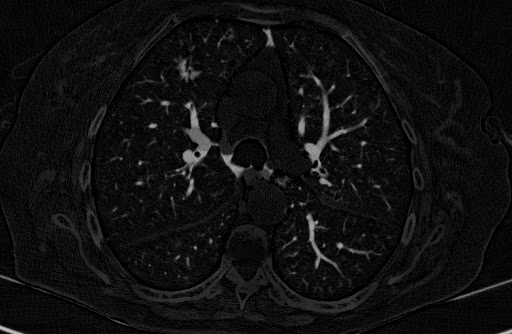

In [ ]:
# TopHat Transformation
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, mask)
show(tophat)

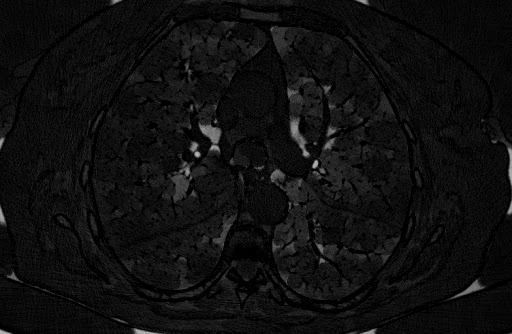

In [ ]:
# BottomHat Transformation
bottomhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, mask)
show(bottomhat)

# **Implementation of the novel algorithm as per the research paper**

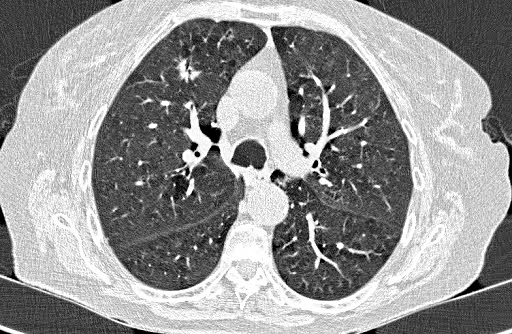

In [ ]:
final_img = cv.subtract(cv.add(img,tophat),bottomhat)
show(final_img)

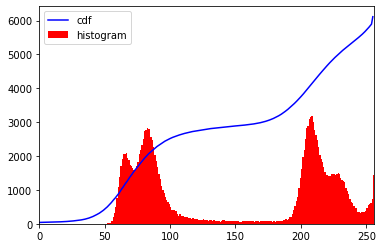

In [ ]:
hist,bins = np.histogram(final_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# **Applying CLAHE (Contrast limited adaptive histogram equalization)**

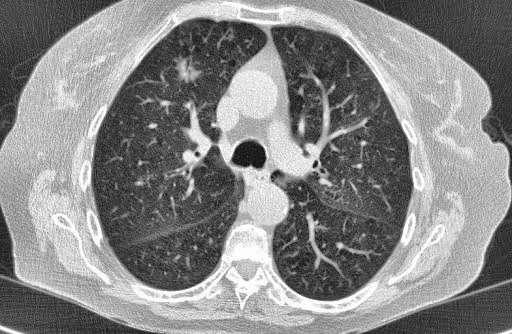

In [ ]:
# Contrast limited adaptive histogram equalization on original image
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(img)
show(cl)

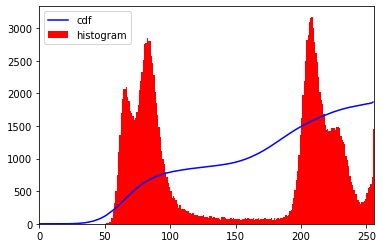

In [ ]:
hist,bins = np.histogram(cl.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

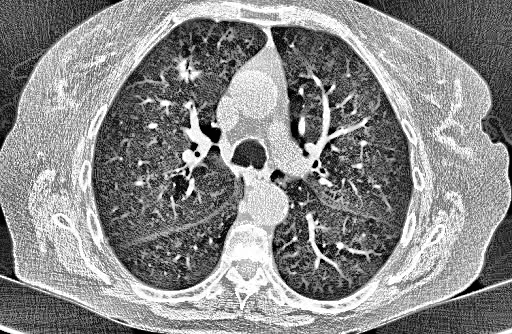

In [ ]:
# Contrast limited adaptive histogram equalization on the image obtained after novel morphological transformation 
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(final_img)
show(cl)

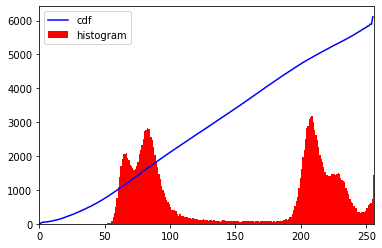

In [ ]:
hist,bins = np.histogram(cl.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Final Implementation

Original image :



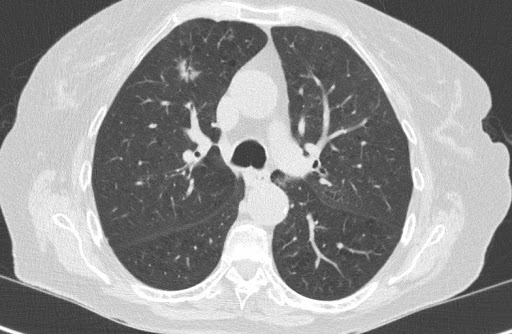


Kernel size =  5

Image after applying novel morphological transformation :



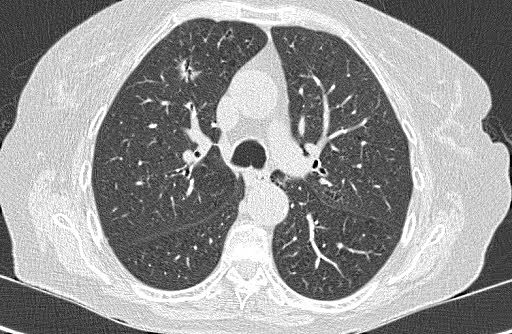


Image after applying contrast limited adaptive histogram equalization :



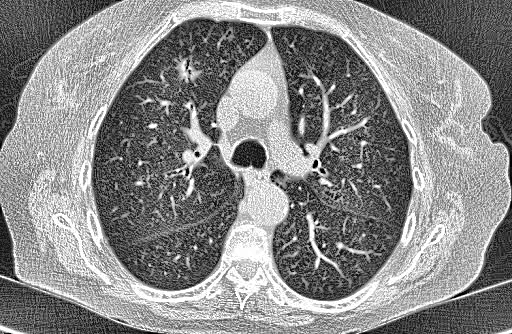


*****************************************************************************

Kernel size =  15

Image after applying novel morphological transformation :



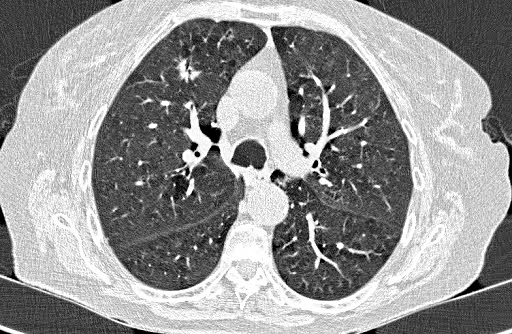


Image after applying contrast limited adaptive histogram equalization :



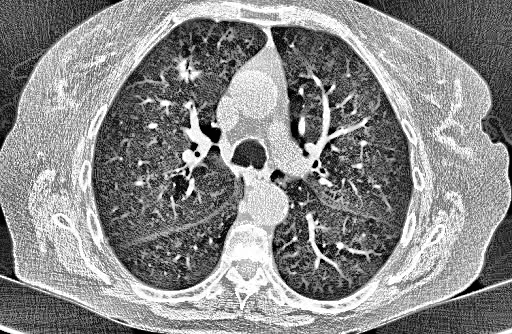


*****************************************************************************

Kernel size =  30

Image after applying novel morphological transformation :



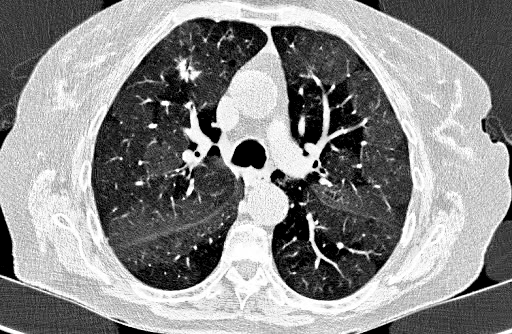


Image after applying contrast limited adaptive histogram equalization :



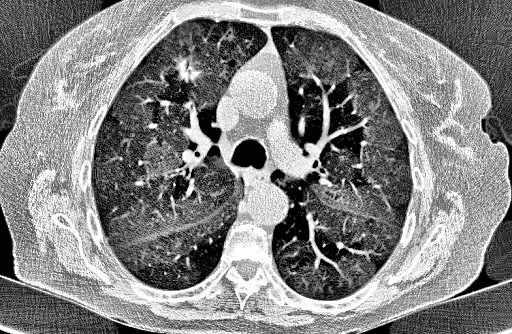


*****************************************************************************

Kernel size =  45

Image after applying novel morphological transformation :



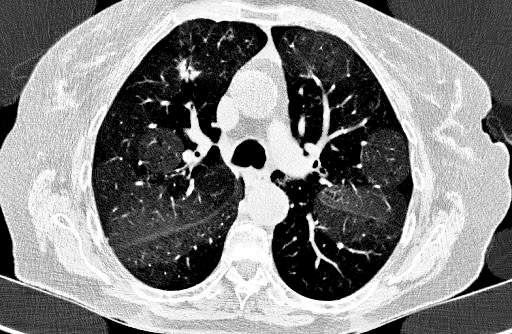


Image after applying contrast limited adaptive histogram equalization :



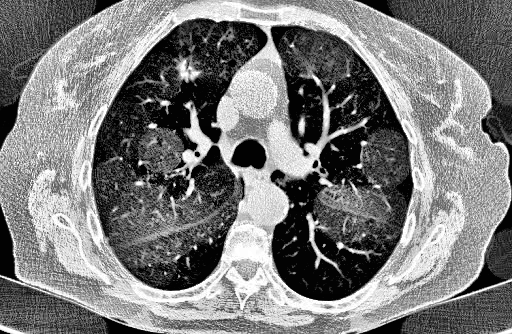


*****************************************************************************

Kernel size =  60

Image after applying novel morphological transformation :



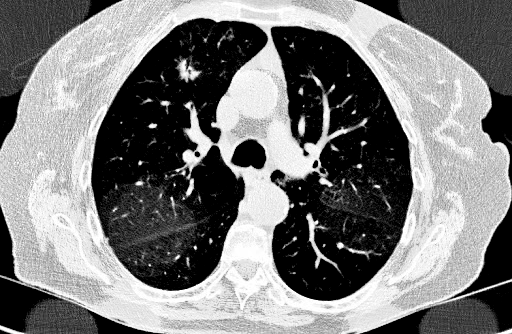


Image after applying contrast limited adaptive histogram equalization :



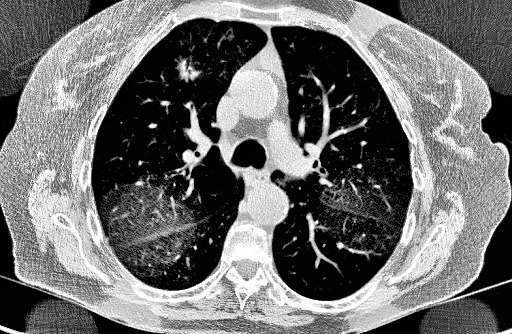


*****************************************************************************

Kernel size =  90

Image after applying novel morphological transformation :



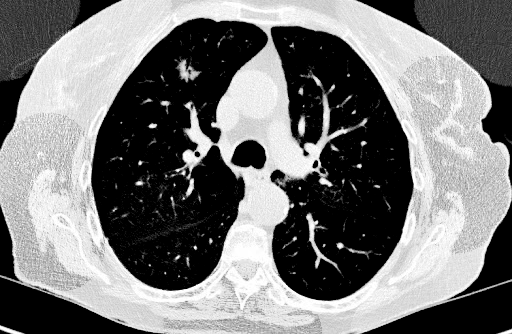


Image after applying contrast limited adaptive histogram equalization :



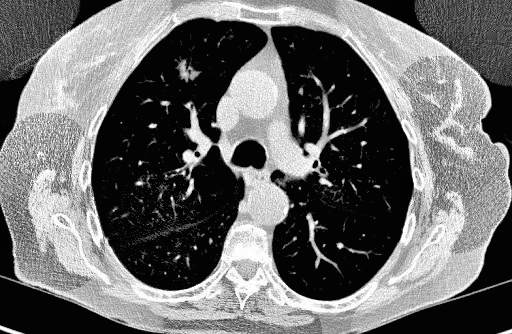


*****************************************************************************



In [ ]:
size = [5, 15, 30, 45, 60, 90]
print("Original image :")
print()
show(img)
print()
for n in size:
  mask = cv.getStructuringElement(cv.MORPH_ELLIPSE,(n,n))
  tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, mask)
  bottomhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, mask)
  final_img = cv.subtract(cv.add(img,tophat),bottomhat)
  print("Kernel size = ", n)
  print()
  print("Image after applying novel morphological transformation :")
  print()
  show(final_img)
  print()
  print("Image after applying contrast limited adaptive histogram equalization :")
  print()
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  f_img = clahe.apply(final_img)
  show(f_img)
  print()
  print("*****************************************************************************")
  print()

# **Instead of using elliptical masks, now we are using circular masks. We are using dilation to increase the size of the mask.**

# **Evaluation using Contrast Improvement Ratio**

Original image :



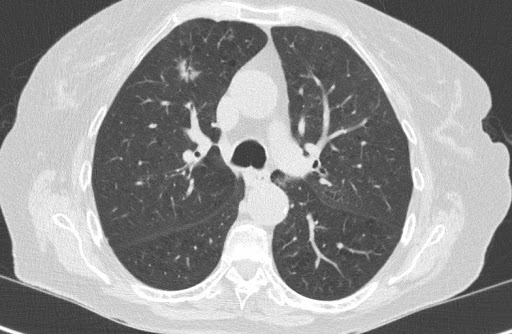


Kernel :  1

Image after applying novel morphological transformation :



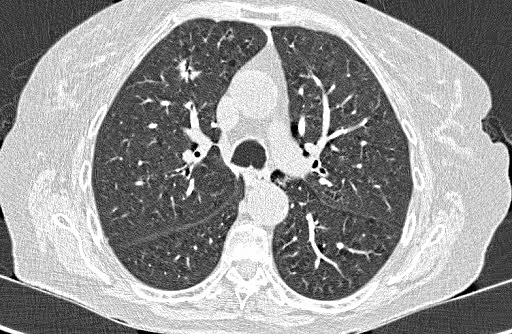


Image after applying contrast limited adaptive histogram equalization :



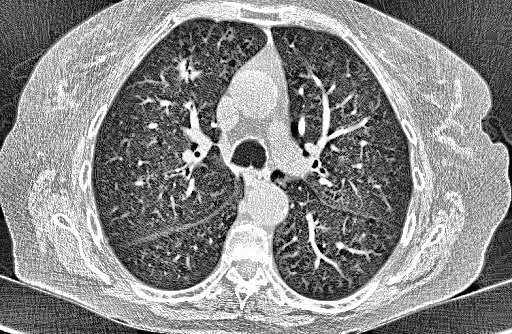


CIR :  0.3532122033942931
*****************************************************************************

Kernel :  2

Image after applying novel morphological transformation :



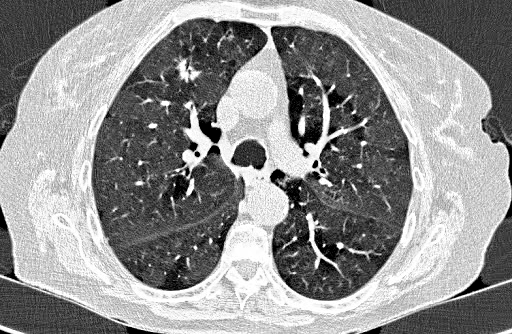


Image after applying contrast limited adaptive histogram equalization :



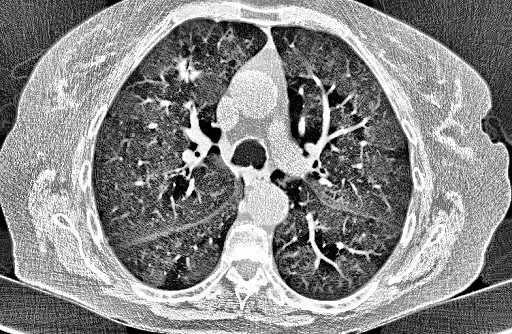

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


CIR :  0.5858693634584513
*****************************************************************************

Kernel :  3

Image after applying novel morphological transformation :



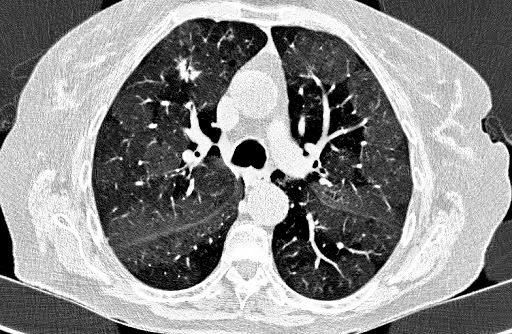


Image after applying contrast limited adaptive histogram equalization :



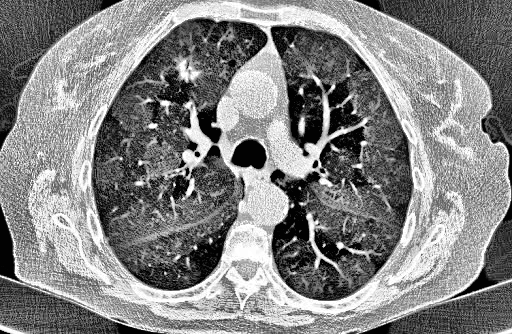


CIR :  0.7226876443829717
*****************************************************************************

Kernel :  4

Image after applying novel morphological transformation :



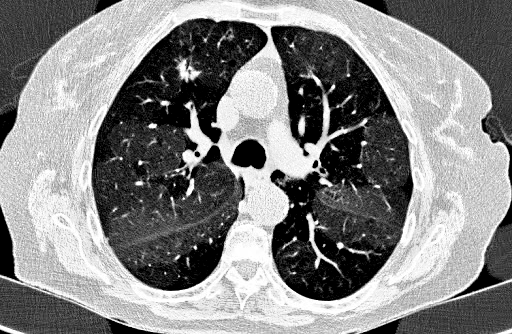


Image after applying contrast limited adaptive histogram equalization :



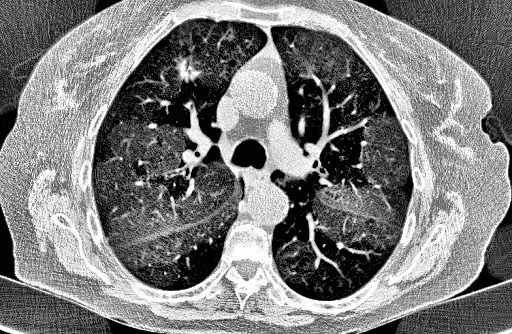


CIR :  0.8043712011155408
*****************************************************************************

Kernel :  5

Image after applying novel morphological transformation :



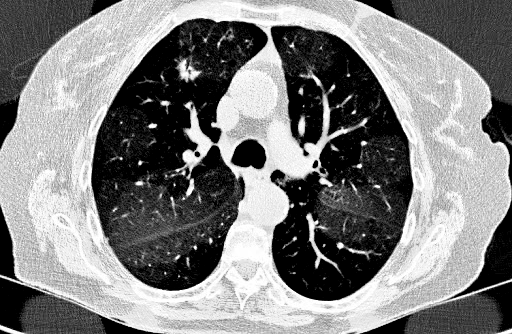


Image after applying contrast limited adaptive histogram equalization :



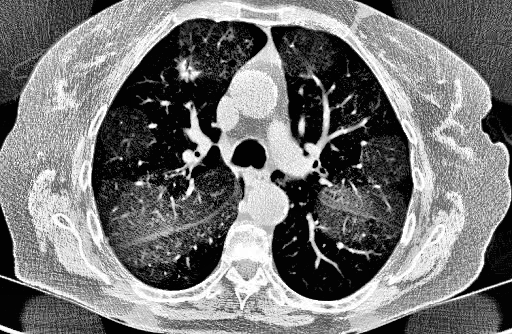


CIR :  0.8558361637128732
*****************************************************************************



In [29]:
print("Original image :")
print()
show(img)
print()
radius =5
sze = (60*radius//2)
kernel = np.zeros((60*radius+1, 60*radius+1))
y,x = np.ogrid[-sze:sze+1, -sze:sze+1]
mask = x**2 + y**2 <= radius**2
kernel[mask] = 1
kernel = kernel.astype(np.uint8)
original_mask = kernel[:]
c_x_y = []
for i in range(5):
  tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
  bottomhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
  img_final = cv.subtract(cv.add(img,tophat),bottomhat)
  print("Kernel : ", i+1)
  print()
  print("Image after applying novel morphological transformation :")
  print()
  show(img_final)
  print()
  print("Image after applying contrast limited adaptive histogram equalization :")
  print()
  kernel = cv.dilate(kernel, original_mask, iterations=1)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  f_img = clahe.apply(img_final)
  show(f_img)
  print()
  #calculating c(x,y)
  blur_7 = cv.blur(img_final,(7,7))
  blur_3 = cv.blur(img_final,(3,3))

  blur_7_ori = cv.blur(img,(7,7))
  blur_3_ori = cv.blur(img,(3,3))

  h,w = img_final.shape
  # print(h,w)
  CIR = 0
  num = 0
  den = 0
  den_c = 0
  for j in range(h):
    flag = True
    for k in range(w):
      p_hat = (blur_7[j][k] *49 - blur_3[j][k] *9)/40
      a_hat = blur_3[j][k]
      c_hat = abs((p_hat-a_hat))/(p_hat+a_hat)
      p_ori = (blur_7_ori[j][k] *49 - blur_3_ori[j][k] *9)/40
      a_ori = blur_3_ori[j][k]
      c = abs((p_ori-a_ori))/(p_ori+a_ori)
      if not math.isnan(c) and not math.isnan(c_hat):
        num += (c-c_hat)**2
        den += c**2
        den_c += c_hat**2


  CIR = num/den_c
  print("CIR : ", CIR)
  print("*****************************************************************************")
  print()

# Testing on a new image

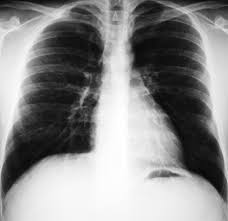

In [ ]:
# Reading the image
img2 = cv.imread('/content/drive/My Drive/image_processing_project/img_2.jpg',0)
show(img2)

Original image :



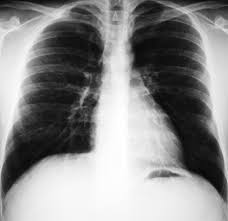


Kernel size =  5

Image after applying novel morphological transformation :



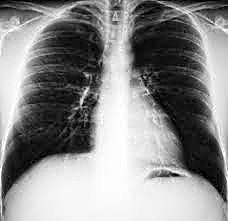


Image after applying contrast limited adaptive histogram equalization :



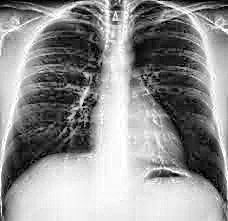


*****************************************************************************

Kernel size =  15

Image after applying novel morphological transformation :



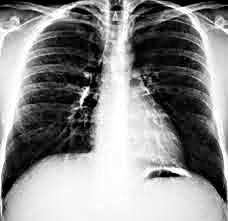


Image after applying contrast limited adaptive histogram equalization :



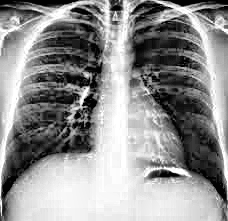


*****************************************************************************

Kernel size =  30

Image after applying novel morphological transformation :



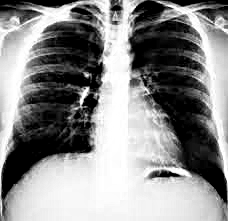


Image after applying contrast limited adaptive histogram equalization :



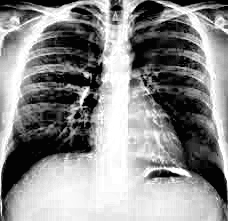


*****************************************************************************

Kernel size =  45

Image after applying novel morphological transformation :



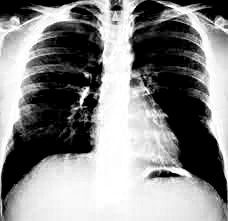


Image after applying contrast limited adaptive histogram equalization :



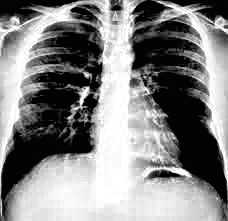


*****************************************************************************

Kernel size =  60

Image after applying novel morphological transformation :



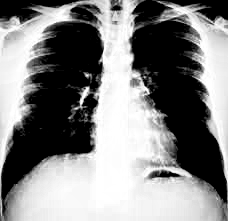


Image after applying contrast limited adaptive histogram equalization :



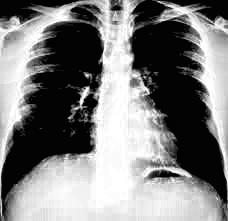


*****************************************************************************

Kernel size =  90

Image after applying novel morphological transformation :



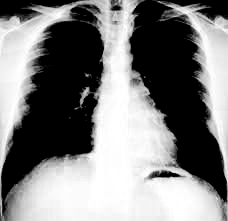


Image after applying contrast limited adaptive histogram equalization :



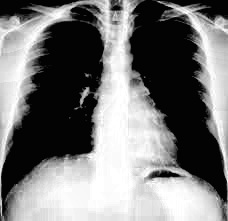


*****************************************************************************



In [27]:
# Implementation using different sized elliptical masks
size = [5, 15, 30, 45, 60, 90]
print("Original image :")
print()
show(img2)
print()
for n in size:
  mask = cv.getStructuringElement(cv.MORPH_ELLIPSE,(n,n))
  tophat = cv.morphologyEx(img2, cv.MORPH_TOPHAT, mask)
  bottomhat = cv.morphologyEx(img2, cv.MORPH_BLACKHAT, mask)
  final_img = cv.subtract(cv.add(img2,tophat),bottomhat)
  print("Kernel size = ", n)
  print()
  print("Image after applying novel morphological transformation :")
  print()
  show(final_img)
  print()
  print("Image after applying contrast limited adaptive histogram equalization :")
  print()
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  f_img = clahe.apply(final_img)
  show(f_img)
  print()
  print("*****************************************************************************")
  print()

# **Evaluation using Contrast Improvement Ratio**

Original image :



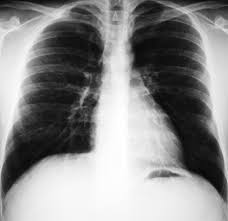


Kernel :  1

Image after applying novel morphological transformation :



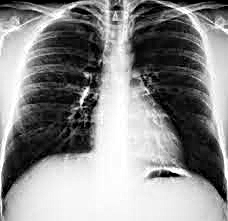


Image after applying contrast limited adaptive histogram equalization :



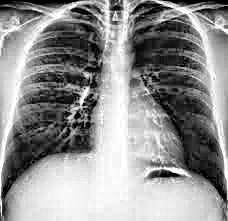

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


0.9362046091176012
*****************************************************************************

Kernel :  2

Image after applying novel morphological transformation :



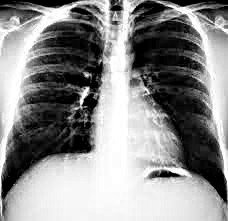


Image after applying contrast limited adaptive histogram equalization :



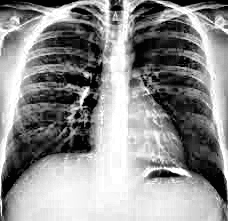


0.947734874359355
*****************************************************************************

Kernel :  3

Image after applying novel morphological transformation :



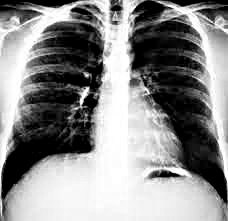


Image after applying contrast limited adaptive histogram equalization :



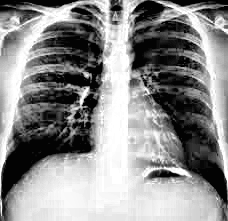


0.9537020944516674
*****************************************************************************

Kernel :  4

Image after applying novel morphological transformation :



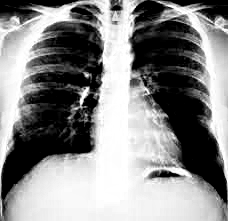


Image after applying contrast limited adaptive histogram equalization :



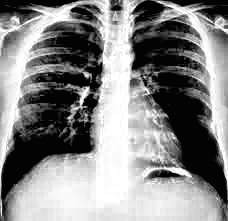


0.9571795486099245
*****************************************************************************

Kernel :  5

Image after applying novel morphological transformation :



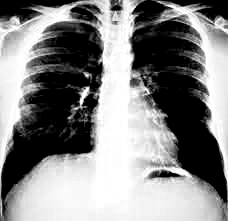


Image after applying contrast limited adaptive histogram equalization :



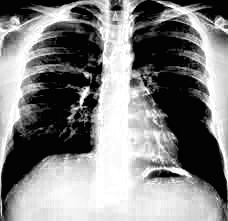


0.9579860551846334
*****************************************************************************



In [25]:
# Implementation using circular masks
import math
print("Original image :")
print()
show(img2)
print()
radius =5
sze = (60*radius//2)
kernel = np.zeros((60*radius+1, 60*radius+1))
y,x = np.ogrid[-sze:sze+1, -sze:sze+1]
mask = x**2 + y**2 <= radius**2
kernel[mask] = 1
kernel = kernel.astype(np.uint8)
original_mask = kernel[:]
c_x_y = []
for i in range(5):
  tophat = cv.morphologyEx(img2, cv.MORPH_TOPHAT, kernel)
  bottomhat = cv.morphologyEx(img2, cv.MORPH_BLACKHAT, kernel)
  img_final = cv.subtract(cv.add(img2,tophat),bottomhat)
  print("Kernel : ", i+1)
  print()
  print("Image after applying novel morphological transformation :")
  print()
  show(img_final)
  print()
  print("Image after applying contrast limited adaptive histogram equalization :")
  print()
  kernel = cv.dilate(kernel, original_mask, iterations=1)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  f_img = clahe.apply(img_final)
  show(f_img)
  print()
  blur_7 = cv.blur(img_final,(7,7))
  blur_3 = cv.blur(img_final,(3,3))

  blur_7_ori = cv.blur(img,(7,7))
  blur_3_ori = cv.blur(img,(3,3))

  h,w = img_final.shape
  # print(h,w)
  CIR = 0
  num = 0
  den = 0
  den_c = 0
  for j in range(h):
    flag = True
    for k in range(w):
      p_hat = (blur_7[j][k] *49 - blur_3[j][k] *9)/40
      a_hat = blur_3[j][k]
      c_hat = abs((p_hat-a_hat))/(p_hat+a_hat)
      p_ori = (blur_7_ori[j][k] *49 - blur_3_ori[j][k] *9)/40
      a_ori = blur_3_ori[j][k]
      c = abs((p_ori-a_ori))/(p_ori+a_ori)
      if not math.isnan(c) and not math.isnan(c_hat):
        num += (c-c_hat)**2
        den += c**2
        den_c += c_hat**2

  # print(num, den, den_c)
  CIR = num/den
  print(CIR)
  #show(img_final)
  print("*****************************************************************************")
  print()